In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

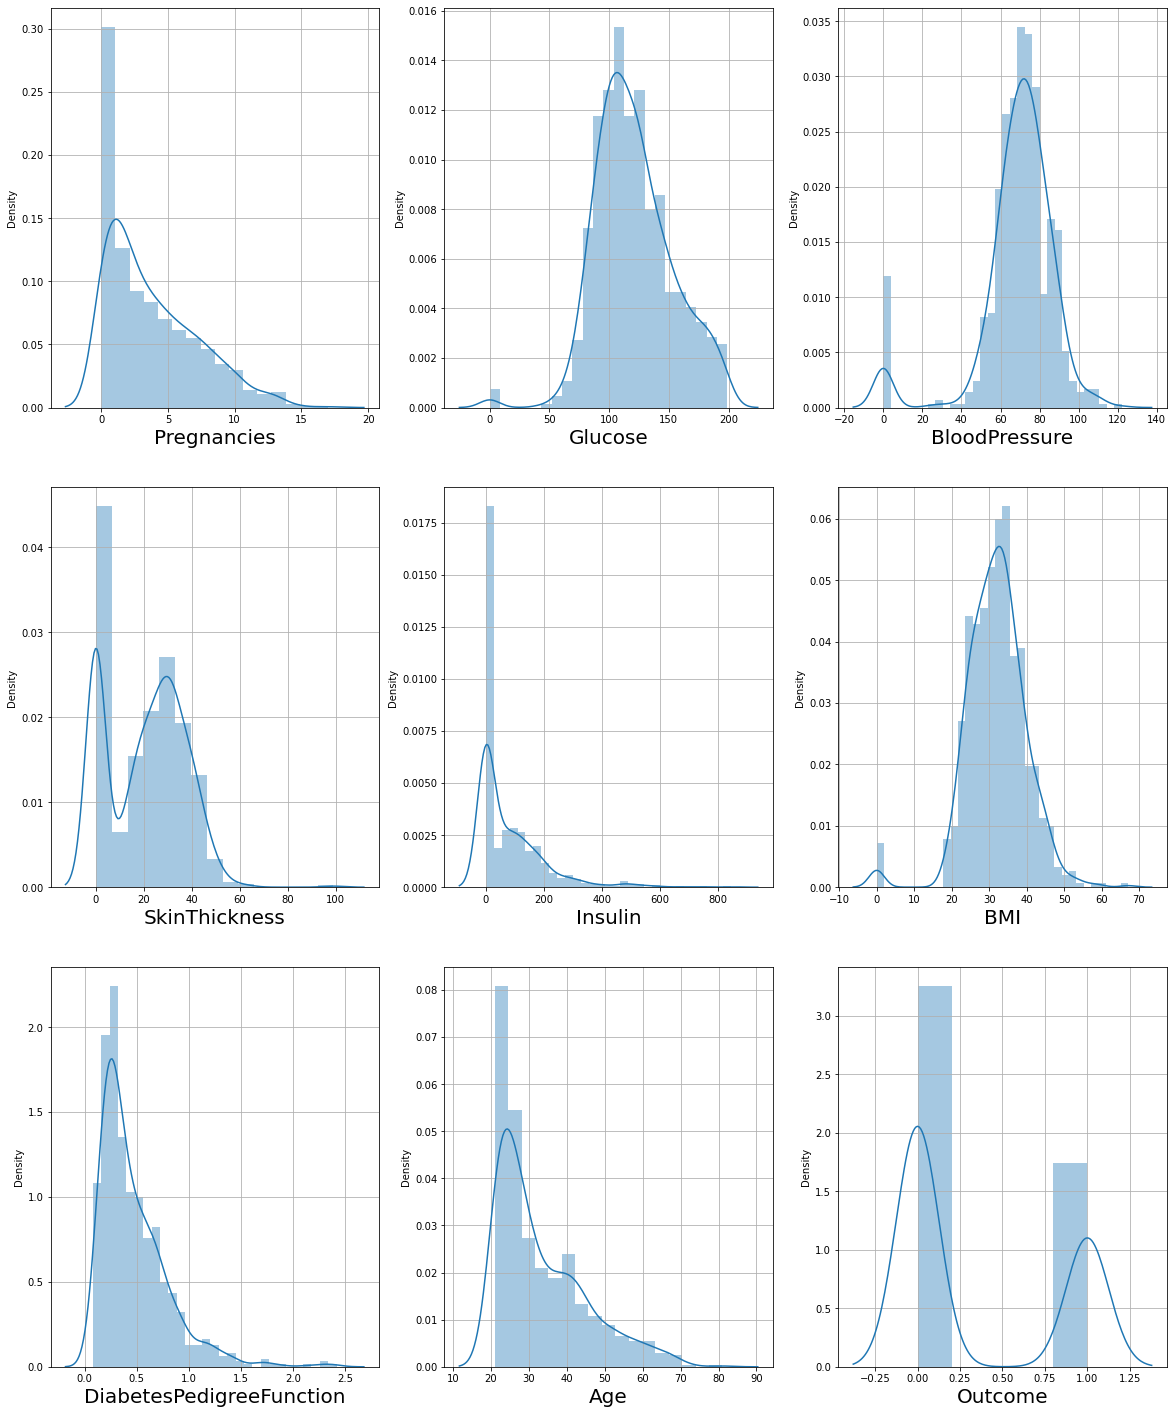

In [3]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dataset:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(dataset[column])
        plt.xlabel(column,fontsize=20)
        plt.grid()
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1

plt.show()

In [4]:
# replacing zero values with the mean of the column
dataset['BMI'] = dataset['BMI'].replace(0,dataset['BMI'].mean())
dataset['BloodPressure'] = dataset['BloodPressure'].replace(0,dataset['BloodPressure'].mean())
dataset['Glucose'] = dataset['Glucose'].replace(0,dataset['Glucose'].mean())
dataset['Insulin'] = dataset['Insulin'].replace(0,dataset['Insulin'].mean())
dataset['SkinThickness'] = dataset['SkinThickness'].replace(0,dataset['SkinThickness'].mean())

C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

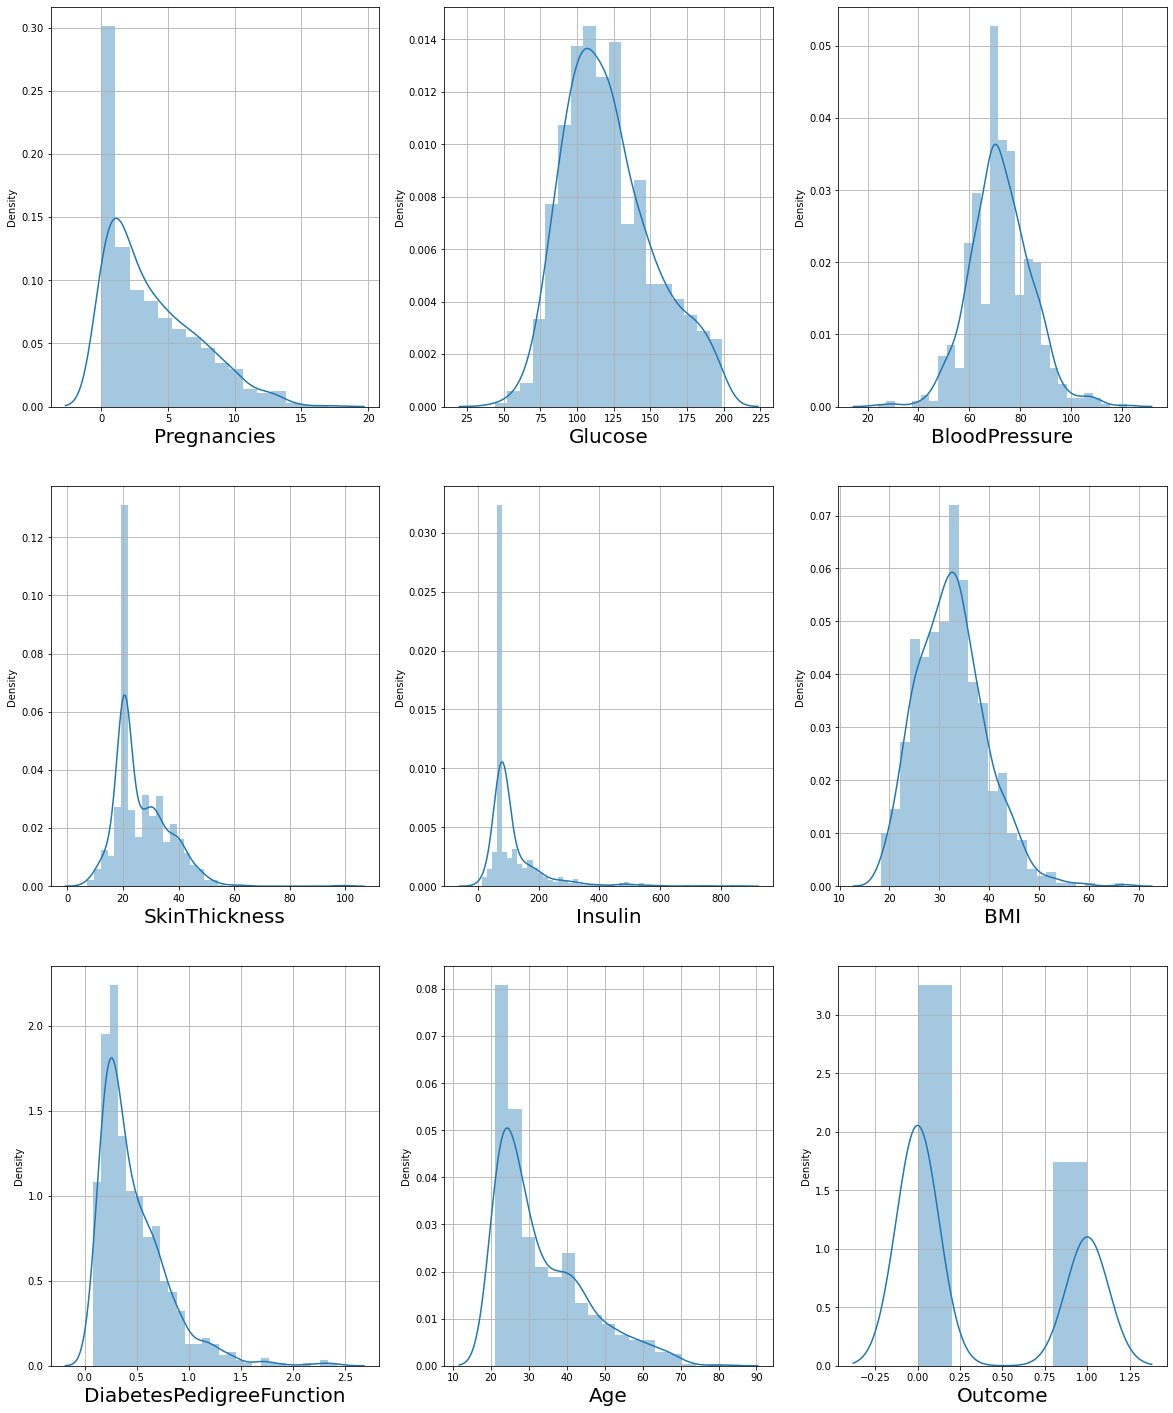

In [5]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dataset:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(dataset[column])
        plt.xlabel(column,fontsize=20)
        plt.grid()
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1

plt.show()

<AxesSubplot:>

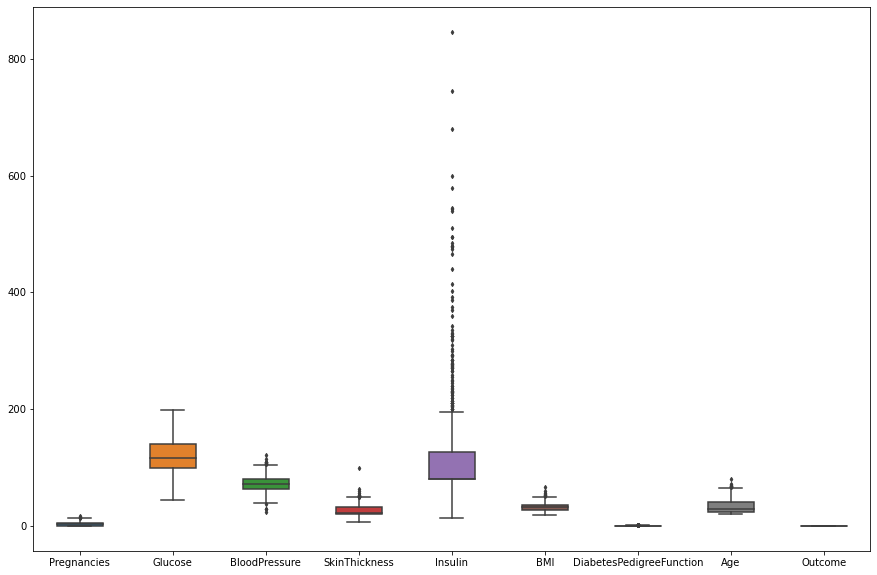

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=dataset, width= 0.5,ax=ax,  fliersize=3)

In [7]:
dataset.shape

(768, 9)

In [8]:
q = dataset['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = dataset[dataset['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

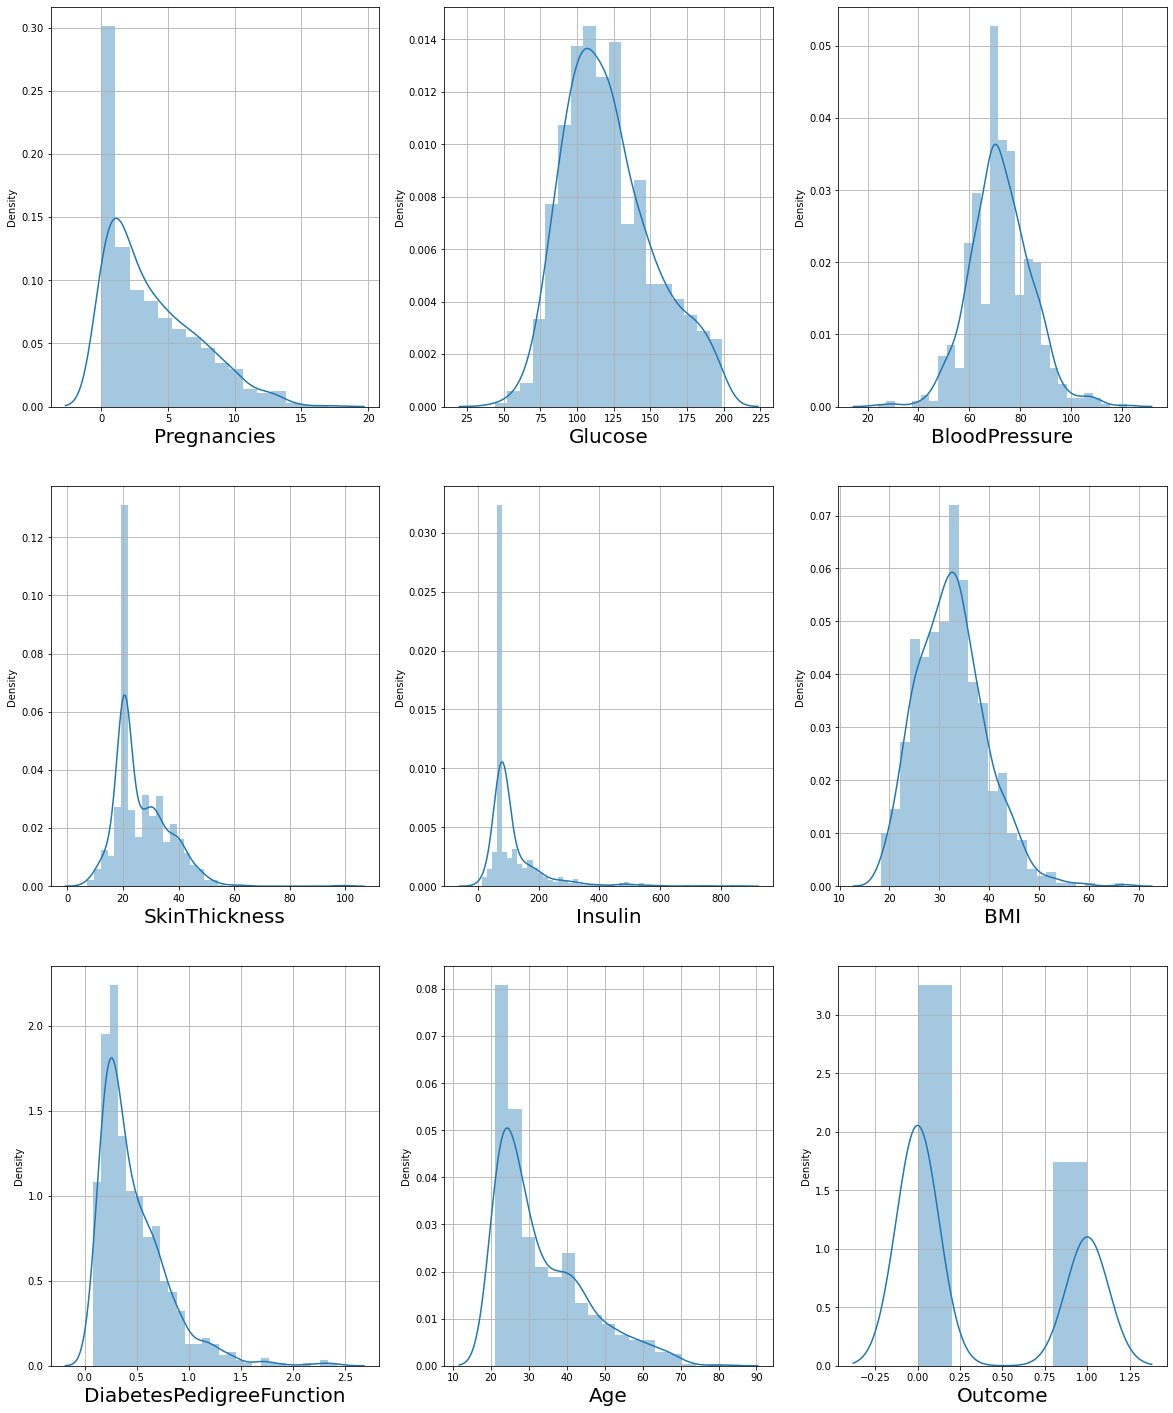

In [9]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dataset:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(dataset[column])
        plt.xlabel(column,fontsize=20)
        plt.grid()
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1

plt.show()

In [10]:
X = data_cleaned.drop(columns=['Outcome'])
y = data_cleaned['Outcome']

C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\U

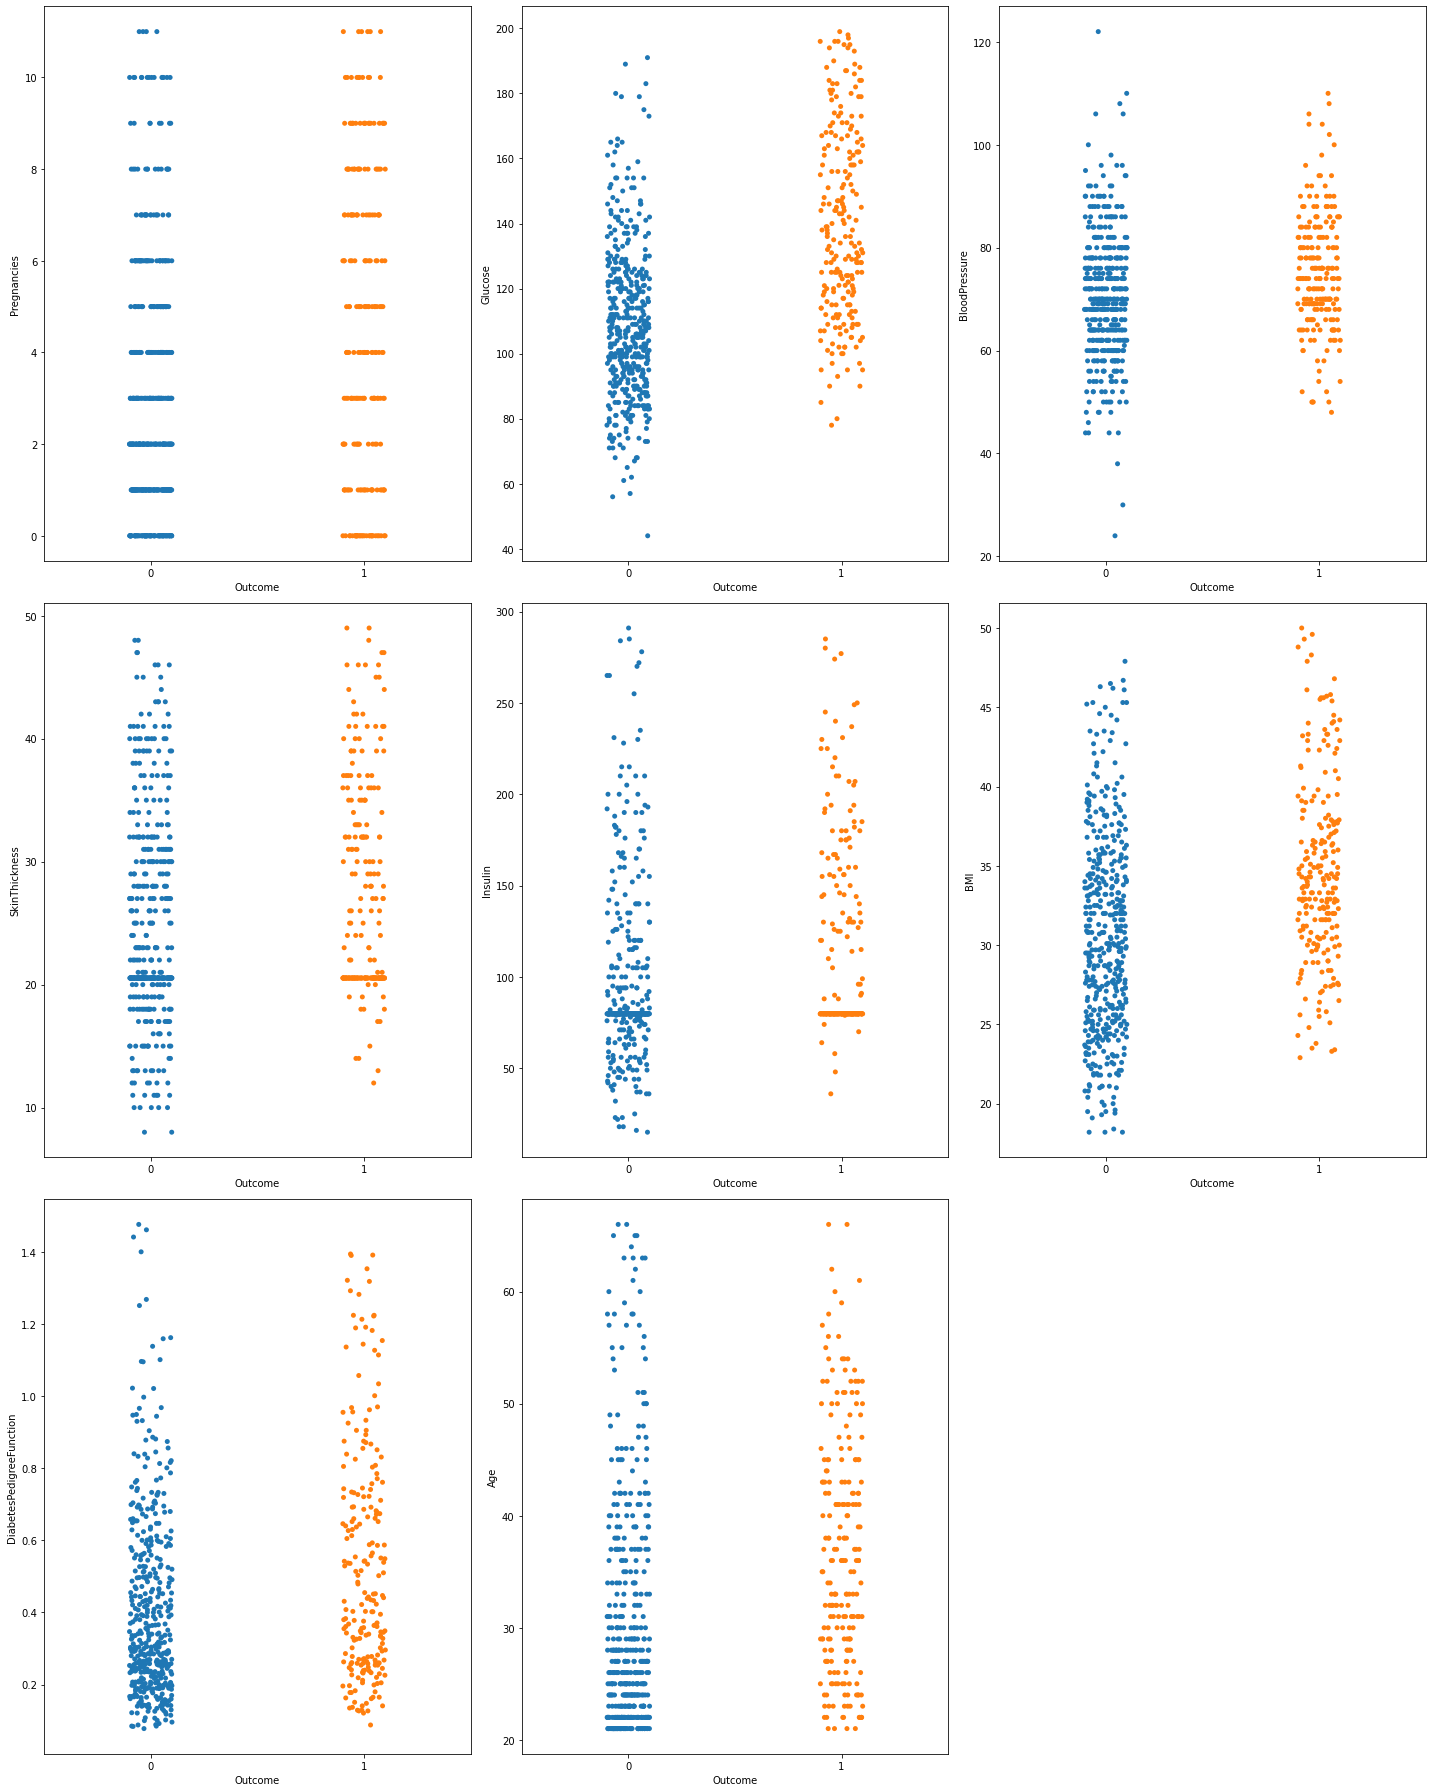

In [11]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [12]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [13]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns
vif

,VIF,Features
0,1.449056,Pregnancies
1,1.304263,Glucose
2,1.262686,BloodPressure
3,1.470049,SkinThickness
4,1.271017,Insulin
5,1.513160,BMI
6,1.042300,DiabetesPedigreeFunction
7,1.662728,Age


In [14]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25)

In [15]:
# let's fit the data into kNN model and see how well it performs:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [16]:
y_pred = knn.predict(x_test)

In [17]:
knn.score(x_train,y_train)

0.8316831683168316

In [18]:
print("The testing accuracy score is : ", accuracy_score(y_test,y_pred))

The testing accuracy score is :  0.7514792899408284


In [19]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [20]:
grid_search = GridSearchCV(knn,param_grid=param_grid,verbose=1,n_jobs=-1)

In [21]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:    3.7s finished


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=1)

In [22]:
# let's see the  best parameters according to gridsearch
grid_search.best_params_


{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 13}

In [23]:
knn = KNeighborsClassifier(n_neighbors=13,leaf_size=18,algorithm='ball_tree',n_jobs=-1)

In [24]:
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.805940594059406

In [25]:
knn.score(x_test,y_test)

0.7396449704142012

In [26]:
#k-fold cross validation 
kfold = KFold(n_splits=12,random_state= 42)
kfold.get_n_splits(X_scaled)

C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


12

In [27]:
from statistics import mean
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    knn.fit(X_train,y_train)
    train_score_ = knn.score(X_train,y_train)
    test_score_ =  knn.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   0.8055105348460292 and test score is :   0.6842105263157895
for k =  2
train_score is :   0.7990275526742301 and test score is :   0.8070175438596491
for k =  3
train_score is :   0.7977346278317152 and test score is :   0.8214285714285714
for k =  4
train_score is :   0.8009708737864077 and test score is :   0.6964285714285714
for k =  5
train_score is :   0.7944983818770227 and test score is :   0.6785714285714286
for k =  6
train_score is :   0.8025889967637541 and test score is :   0.75
for k =  7
train_score is :   0.7977346278317152 and test score is :   0.7678571428571429
for k =  8
train_score is :   0.7928802588996764 and test score is :   0.8392857142857143
for k =  9
train_score is :   0.7928802588996764 and test score is :   0.8571428571428571
for k =  10
train_score is :   0.7961165048543689 and test score is :   0.7321428571428571
for k =  11
train_score is :   0.8058252427184466 and test score is :   0.7321428571428571
for k =  12
train_scor

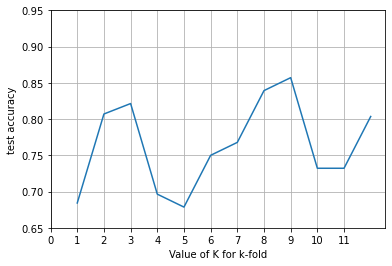

In [28]:
# let's plot the test_accuracy with the value of k in k-fold

plt.plot(count,test_score)
plt.xlabel('Value of K for k-fold')
plt.ylabel('test accuracy')
plt.xticks(np.arange(0, 12, 1)) 
plt.yticks(np.arange(0.65, 1, 0.05)) 
plt.grid()